<a href="https://colab.research.google.com/github/siminsharif/irws/blob/main/IRWS_HM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

downloading database

In [ ]:
!gdown https://drive.google.com/uc?id=1N5V40HQsnCHHytdmG98YfXvN_3DCjV67 -O dataframe_hamshahri2.tar


Downloading...
From (original): https://drive.google.com/uc?id=1N5V40HQsnCHHytdmG98YfXvN_3DCjV67
From (redirected): https://drive.google.com/uc?id=1N5V40HQsnCHHytdmG98YfXvN_3DCjV67&confirm=t&uuid=14cf3ed2-9954-43fc-9242-d1e6b1b36bb5
To: /content/dataframe_hamshahri2.tar
100% 160M/160M [00:02<00:00, 71.3MB/s]


loading data

In [ ]:
import pandas as pd

df_docs = pd.read_csv("/content/hamshahri2/docs.csv.gz", compression="gzip")
df_judgments = pd.read_csv("/content/hamshahri2/judgments_dataframe.csv.gz", compression="gzip")
df_queries_fa = pd.read_csv("/content/hamshahri2/queries_fa.csv.gz", compression="gzip")

qrels = {}

filtered = df_judgments[df_judgments["relevancy"] == 1]

for query_id, group in filtered.groupby("query_id"):
    qrels[str(query_id)] = {
        str(doc_id): int(rel)
        for doc_id, rel in zip(group["doc_id"], group["relevancy"])
    }



searching queries into titles

In [ ]:
def search_in_titles(query, df_docs, top_k=20):
    query = query.strip()
    mask = df_docs['title'].str.contains(query, case=False, na=False)
    results = df_docs[mask].head(top_k)
    return results


ranking title search

In [ ]:
# Install BM25 library
!pip install rank-bm25

import pandas as pd
from rank_bm25 import BM25Okapi

# Load the CSV files
df_docs = pd.read_csv("/content/hamshahri2/docs.csv.gz", compression="gzip")
df_judgments = pd.read_csv("/content/hamshahri2/judgments_dataframe.csv.gz", compression="gzip")
df_queries_fa = pd.read_csv("/content/hamshahri2/queries_fa.csv.gz", compression="gzip")

# Prepare BM25 on TITLES only (column name = 'TITLE')
corpus = df_docs['TITLE'].fillna("").astype(str).tolist()
tokenized_corpus = [doc.split() for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

def bm25_title_search(query, top_k=20):
    tokenized_query = query.split()
    scores = bm25.get_scores(tokenized_query)
    top_idx = scores.argsort()[::-1][:top_k]
    return df_docs.iloc[top_idx]

# Example search
results = bm25_title_search("اقتصاد ایران", top_k=10)
results




,Unnamed: 0,DOCID,TITLE,CAT_FA,DATE_FA,TEXT,ORIGINALFILE,ISSUE,DATE_EN,CAT_EN
208023,208023,HAM2-810808-004,\nاقتصاد ايران... اقتصاد ايران... اقتصاد ايران...,اقتصاد,1381/08/08,\nگمرك مازندران مقام چهارم ترانزيت خارجي كشور ...,/1381/810808/aeqts.htm,"2002 چهارشنبه 8آبان 1381، , 30. oct، شماره 2883",2002-10-30,Economy
199785,199785,HAM2-810701-018,\nاقتصاد آلمان و اقتصاد آمريكا\n,اقتصاد,1381/07/01,\nفردموند *ماليك \nترجمه: عباس فتاح زاده \nمن ...,/1381/810701/econw.htm,"دوشنبه 1 2002 مهر 1381، , 23. sep، شماره 2848",2002-09-23,Economy
172683,172683,HAM2-820510-027,\nاقتصاد\n,سیاسی,1382/05/10,\nپيمان بازرگاني ميان قم و كربلا امضا شد\nدر پ...,/1382/820510/news/_politic.htm,جمعه 10 مرداد 1382سال يازدهم - شماره 3124,2003-08-01,Politics
179530,179530,HAM2-820517-033,\nاقتصاد\n,سیاسی,1382/05/17,\nواردات روزانه 17 ميليون ليتر بنزين به كشور\n...,/1382/820517/news/_politic.htm,جمعه 17 مرداد 1382سال يازدهم - شماره 3130,2003-08-08,Politics
152326,152326,HAM2-820907-026,\nاقتصاد\n,سیاسی,1382/09/07,\nزمزم، پيشگام رقابت با نوشابه هاي آمريكايي...,/1382/820907/news/_politic.htm,جمعه 7 آذر 1382سال يازدهم - شماره 3237,2003-11-28,Politics
162208,162208,HAM2-820531-032,\nاقتصاد\n,سیاسی,1382/05/31,\n16 كشور جهان در چهارمين نمايشگاه بين المللي ...,/1382/820531/news/_politic.htm,جمعه 31 مرداد 1382سال يازدهم - شماره 3144,2003-08-22,Politics
169767,169767,HAM2-820621-041,\nاقتصاد\n,سیاسی,1382/06/21,\n55 طرح تحقيقاتي در اجلاس ايران و ايكاردا مور...,/1382/820621/news/_politic.htm,جمعه 21 شهريور 1382سال يازدهم - شماره 3164,2003-09-12,Politics
177856,177856,HAM2-820614-034,\nاقتصاد\n,سیاسی,1382/06/14,\nذخاير مالي اعضاي شوراي همكاري به 47 ميلي...,/1382/820614/news/_politic.htm,جمعه 14 شهريور 1382سال يازدهم - شماره 3158,2003-09-05,Politics
170711,170711,HAM2-820524-032,\nاقتصاد\n,سیاسی,1382/05/24,\nقرارداد مجمتع «پي .وي .سي »بين آلمان و اي...,/1382/820524/news/_politic.htm,جمعه 24 مرداد 1382سال يازدهم - شماره 3137,2003-08-15,Politics
160681,160681,HAM2-820607-041,\nاقتصاد\n,سیاسی,1382/06/07,\nبزرگترين كارخانه «نخ تاير» خاورميانه در زنجا...,/1382/820607/news/_politic.htm,جمعه 7 شهريور 1382سال يازدهم - شماره 3151,2003-08-29,Politics


searching queries into texts

In [ ]:
import pandas as pd

# Load data
df_docs = pd.read_csv("/content/hamshahri2/docs.csv.gz", compression="gzip")
df_queries_fa = pd.read_csv("/content/hamshahri2/queries_fa.csv.gz", compression="gzip")

# --- Simple search in TEXT only (no ranking) ---
def text_search_no_rank(query):
    query = str(query).strip()
    return df_docs[df_docs["TEXT"].str.contains(query, case=False, na=False)]

# Example usage
results = text_search_no_rank("اقتصاد ایران")
results


,Unnamed: 0,DOCID,TITLE,CAT_FA,DATE_FA,TEXT,ORIGINALFILE,ISSUE,DATE_EN,CAT_EN


ranking text search

In [ ]:
# Install BM25 library
!pip install rank-bm25

import pandas as pd
from rank_bm25 import BM25Okapi

# Load the CSV files
df_docs = pd.read_csv("/content/hamshahri2/docs.csv.gz", compression="gzip")
df_judgments = pd.read_csv("/content/hamshahri2/judgments_dataframe.csv.gz", compression="gzip")
df_queries_fa = pd.read_csv("/content/hamshahri2/queries_fa.csv.gz", compression="gzip")

# Prepare BM25 on TEXT only
corpus = df_docs['TEXT'].fillna("").astype(str).tolist()
tokenized_corpus = [doc.split() for doc in corpus]

bm25_text = BM25Okapi(tokenized_corpus)

def bm25_text_search(query, top_k=20):
    tokenized_query = query.split()
    scores = bm25_text.get_scores(tokenized_query)
    top_idx = scores.argsort()[::-1][:top_k]
    return df_docs.iloc[top_idx]

# Example search in TEXT only
results = bm25_text_search("اقتصاد ایران", top_k=10)
results


,Unnamed: 0,DOCID,TITLE,CAT_FA,DATE_FA,TEXT,ORIGINALFILE,ISSUE,DATE_EN,CAT_EN
205391,205391,HAM2-801128-017,\nنقش مهم سرمايه گذاري خارجي در اقتصاد\nمالزي ...,اقتصاد.بورس و بانک,1380/11/28,\nسرمايه گذاري و بازرگاني خارجي، همچنان نقش مه...,/1380/801128/bankb.htm,17 feb 2002 يكشنبه 28بهمن 1380،، شماره 2653,2002-02-17,Economy.Bank and Bourse
287565,287565,HAM2-840906-082,\nبانك جهاني اعلام كرد:\nاقتصاد غيررسمي،سازنده...,اقتصاد,1384/09/06,\nمهر: بانك جهاني اعلام كرد: اقتصاد غير رسمي ح...,/1384/840906/news/_eqtes.htm,يكشنبه 6 آذر 1384 - سال سيزدهم - شماره 3860 - ...,2005-11-27,Economy
231396,231396,HAM2-830129-098,\nپيش بيني 7/3درصد رشد براي اقتصاد جهان در سال...,اقتصاد,1383/01/29,\nگروه اقتصادي: در تازه ترين گزارش از روند تحو...,/1383/830129/news/_eqtes.htm,شنبه 29 فروردين 1383 - سال يازدهم - شماره 3353...,2004-04-17,Economy
208485,208485,HAM2-810605-045,\n(IT)\nاقتصاد در اينترنت و مشاغل مربوط به آن\n,علمی فرهنگی.علمی.ارتباطات و فناوری اطلاعات,1381/06/05,\nنفوذ اقتصاد اينترنت بيشتر از قبل به جزيي لاي...,/1381/810605/igozar.htm,"سه شنبه 5 2002 شهريور 1381، , 27. agu، شماره 2822",2002-08-27,Science and Culture.Science.Information and Co...
182402,182402,HAM2-810323-003,\nراه اندازي سايت اينترنتي مباحث اقتصاد\nايران\n,اقتصاد,1381/03/23,\nسايت(پايگاه منابع اقتصاد كلان ايران)از ابتدا...,/1381/810323/aeqts.htm,"2002 پنج شنبه 23خرداد 1381، , 13. jun، شماره 2748",2002-06-13,Economy
41419,41419,HAM2-770130-019,\nنشست ماهانه فارغ التحصيلان \nاقتصاد\n,اقتصاد,1377/01/30,\n. سرويس اقتصادي: نخستين جلسه ماهانه كانون فا...,/1377/770130/eqtes.htm,يكشنبه 30 19 april 98 فروردين 1377،، شماره 1521,1998-04-19,Economy
191578,191578,HAM2-810611-016,\nهراس از آرژانتيني شدن\n,اقتصاد,1381/06/11,\nاقتصاد تركيه \nدرويش با كوله باري از تجربه د...,/1381/810611/econw.htm,"دوشنبه 11 2002 شهريور 1381، , 2. sep، شماره 2828",2002-09-02,Economy
317203,317203,HAM2-831101-102,\nرئيس انجمن اقتصاد اسلامي:\nدنبال سياسي كاري ...,اقتصاد,1383/11/01,\nفارس: رئيس انجمن اقتصاد اسلامي گفت: يكي از ا...,/1383/831101/news/_eqtes.htm,پنجشنبه 1 بهمن 1383 - سال سيزدهم - شماره 3618 ...,2005-01-20,Economy
195691,195691,HAM2-810527-030,\nديدگاه يك استاد دانشگاه درباره تحولات \nاقتص...,اقتصاد,1381/05/27,\nايسنا: تصور اضمحلال اقتصاد آمريكا در پي حادث...,/1381/810527/eqtes.htm,"يكشنبه 27 2002 مرداد 1381، , aug18 شماره 2813",2002-08-18,Economy
134387,134387,HAM2-790317-018,\nاكو، اسكاپ و اقتصاد ايران\n,اقتصاد,1379/03/17,\nمحمد صادق جنان صفت \nروز گذشته پنجاه و ششمين...,/1379/790317/eqtes.htm,سه شنبه 17 6 jun 2000 خرداد 1379،، شماره 2134,2000-06-06,Economy


searching queries into titles+text

In [ ]:
import pandas as pd

# Load data
df_docs = pd.read_csv("/content/hamshahri2/docs.csv.gz", compression="gzip")
df_queries_fa = pd.read_csv("/content/hamshahri2/queries_fa.csv.gz", compression="gzip")

# --- Search in TITLE + TEXT (no ranking) ---
def search_title_text_no_rank(query):
    query = str(query).strip()
    mask = (
        df_docs["TITLE"].str.contains(query, case=False, na=False) |
        df_docs["TEXT"].str.contains(query, case=False, na=False)
    )
    return df_docs[mask]

# Example usage
results = search_title_text_no_rank("اقتصاد ایران")
results


,Unnamed: 0,DOCID,TITLE,CAT_FA,DATE_FA,TEXT,ORIGINALFILE,ISSUE,DATE_EN,CAT_EN


ranking titles+text search

In [ ]:
from rank_bm25 import BM25Okapi
import pandas as pd

# Load data
df_docs = pd.read_csv("/content/hamshahri2/docs.csv.gz", compression="gzip")

# --- Step 1: Build combined field (TITLE + TEXT) ---
df_docs["COMBINED"] = (
    df_docs["TITLE"].fillna("") + " " +
    df_docs["TEXT"].fillna("")
)

# --- Step 2: Prepare BM25 corpus ---
corpus = df_docs["COMBINED"].astype(str).tolist()
tokenized_corpus = [doc.split() for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

# --- Step 3: BM25 search function ---
def bm25_search_title_text(query, top_k=10):
    tokenized_query = query.split()
    scores = bm25.get_scores(tokenized_query)
    df_docs["score"] = scores
    return df_docs.sort_values("score", ascending=False).head(top_k)

# Example
results = bm25_search_title_text("اقتصاد ایران", top_k=10)
results


,Unnamed: 0,DOCID,TITLE,CAT_FA,DATE_FA,TEXT,ORIGINALFILE,ISSUE,DATE_EN,CAT_EN,COMBINED,score
205391,205391,HAM2-801128-017,\nنقش مهم سرمايه گذاري خارجي در اقتصاد\nمالزي ...,اقتصاد.بورس و بانک,1380/11/28,\nسرمايه گذاري و بازرگاني خارجي، همچنان نقش مه...,/1380/801128/bankb.htm,17 feb 2002 يكشنبه 28بهمن 1380،، شماره 2653,2002-02-17,Economy.Bank and Bourse,\nنقش مهم سرمايه گذاري خارجي در اقتصاد\nمالزي ...,7.046073
287565,287565,HAM2-840906-082,\nبانك جهاني اعلام كرد:\nاقتصاد غيررسمي،سازنده...,اقتصاد,1384/09/06,\nمهر: بانك جهاني اعلام كرد: اقتصاد غير رسمي ح...,/1384/840906/news/_eqtes.htm,يكشنبه 6 آذر 1384 - سال سيزدهم - شماره 3860 - ...,2005-11-27,Economy,\nبانك جهاني اعلام كرد:\nاقتصاد غيررسمي،سازنده...,7.021594
41419,41419,HAM2-770130-019,\nنشست ماهانه فارغ التحصيلان \nاقتصاد\n,اقتصاد,1377/01/30,\n. سرويس اقتصادي: نخستين جلسه ماهانه كانون فا...,/1377/770130/eqtes.htm,يكشنبه 30 19 april 98 فروردين 1377،، شماره 1521,1998-04-19,Economy,\nنشست ماهانه فارغ التحصيلان \nاقتصاد\n \n. سر...,7.017116
208485,208485,HAM2-810605-045,\n(IT)\nاقتصاد در اينترنت و مشاغل مربوط به آن\n,علمی فرهنگی.علمی.ارتباطات و فناوری اطلاعات,1381/06/05,\nنفوذ اقتصاد اينترنت بيشتر از قبل به جزيي لاي...,/1381/810605/igozar.htm,"سه شنبه 5 2002 شهريور 1381، , 27. agu، شماره 2822",2002-08-27,Science and Culture.Science.Information and Co...,\n(IT)\nاقتصاد در اينترنت و مشاغل مربوط به آن\...,6.996296
317203,317203,HAM2-831101-102,\nرئيس انجمن اقتصاد اسلامي:\nدنبال سياسي كاري ...,اقتصاد,1383/11/01,\nفارس: رئيس انجمن اقتصاد اسلامي گفت: يكي از ا...,/1383/831101/news/_eqtes.htm,پنجشنبه 1 بهمن 1383 - سال سيزدهم - شماره 3618 ...,2005-01-20,Economy,\nرئيس انجمن اقتصاد اسلامي:\nدنبال سياسي كاري ...,6.956559
182402,182402,HAM2-810323-003,\nراه اندازي سايت اينترنتي مباحث اقتصاد\nايران\n,اقتصاد,1381/03/23,\nسايت(پايگاه منابع اقتصاد كلان ايران)از ابتدا...,/1381/810323/aeqts.htm,"2002 پنج شنبه 23خرداد 1381، , 13. jun، شماره 2748",2002-06-13,Economy,\nراه اندازي سايت اينترنتي مباحث اقتصاد\nايران...,6.946027
231396,231396,HAM2-830129-098,\nپيش بيني 7/3درصد رشد براي اقتصاد جهان در سال...,اقتصاد,1383/01/29,\nگروه اقتصادي: در تازه ترين گزارش از روند تحو...,/1383/830129/news/_eqtes.htm,شنبه 29 فروردين 1383 - سال يازدهم - شماره 3353...,2004-04-17,Economy,\nپيش بيني 7/3درصد رشد براي اقتصاد جهان در سال...,6.942240
303033,303033,HAM2-840703-068,\nوزير اقتصاد و دارايي:\nتفكر اقتصاد دولتي سال...,اقتصاد,1384/07/03,\n,/1384/840703/news/_eqtes.htm,يكشنبه 3 مهر 1384 - سال سيزدهم - شماره 3808 - ...,2005-09-25,Economy,\nوزير اقتصاد و دارايي:\nتفكر اقتصاد دولتي سال...,6.940077
246843,246843,HAM2-830503-109,\nنگاه نشريه بررسي اقتصاد خاورميانه به اقتصاد ...,اقتصاد,1383/05/03,\n,/1383/830503/world/_econw.htm,شنبه 3 مرداد 1383 - شماره 3445,2004-07-24,Economy,\nنگاه نشريه بررسي اقتصاد خاورميانه به اقتصاد ...,6.917455
248224,248224,HAM2-830618-124,\nشاهرودي: اقتصاد تعاوني به روح اقتصاد اسلامي ...,سیاسی,1383/06/18,\nرئيس قوه قضائيه با بيان اين كه اقتصاد ت...,/1383/830618/news/_siasi.htm,چهارشنبه 18 شهريور 1383 - سال يازدهم - شماره 3...,2004-09-08,Politics,\nشاهرودي: اقتصاد تعاوني به روح اقتصاد اسلامي ...,6.908341


evaluation parameters

In [ ]:
import pandas as pd

df_judgments = pd.read_csv("/content/hamshahri2/judgments_dataframe.csv.gz", compression="gzip")
print(df_judgments.columns)


Index(['Unnamed: 0', 'query_id', 'doc_id', 'relevancy'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from rank_bm25 import BM25Okapi
import gc

# -------------------------------
# Step 0: Load essential columns
# -------------------------------
df_docs = pd.read_csv(
    "/content/hamshahri2/docs.csv.gz",
    compression="gzip",
    usecols=['DOCID','TITLE','TEXT'],
    dtype={'DOCID': str, 'TITLE': str, 'TEXT': str}
)

df_queries_fa = pd.read_csv(
    "/content/hamshahri2/queries_fa.csv.gz",
    compression="gzip",
    usecols=['ID','TITLE'],
    dtype={'ID': str, 'TITLE': str}
)

df_judgments = pd.read_csv("/content/hamshahri2/judgments_dataframe.csv.gz", compression="gzip")
df_judgments['doc_id'] = df_judgments['doc_id'].astype(str)

# Build qrels
filtered = df_judgments[df_judgments["relevancy"] == 1]
qrels = {}
for query_id, group in filtered.groupby("query_id"):
    qrels[str(query_id)] = {str(doc_id): int(rel) for doc_id, rel in zip(group['doc_id'], group['relevancy'])}

# -------------------------------
# Step 1: Non-ranked searches
# -------------------------------
def search_in_titles(query, top_k=10):
    mask = df_docs['TITLE'].str.contains(query, case=False, na=False)
    return df_docs.loc[mask, ['DOCID']].head(top_k)

def text_search_no_rank(query):
    mask = df_docs['TEXT'].str.contains(query, case=False, na=False)
    return df_docs.loc[mask, ['DOCID']]

def search_title_text_no_rank(query):
    mask = (
        df_docs['TITLE'].str.contains(query, case=False, na=False) |
        df_docs['TEXT'].str.contains(query, case=False, na=False)
    )
    return df_docs.loc[mask, ['DOCID']]

def wrap_no_rank(search_func):
    def wrapped(query, top_k=10):
        return search_func(query).head(top_k)
    return wrapped

text_search_wrapped = wrap_no_rank(text_search_no_rank)
title_text_search_wrapped = wrap_no_rank(search_title_text_no_rank)

# -------------------------------
# Step 2: BM25 searches
# -------------------------------
# BM25 Title-only
tokenized_titles = [doc.split() for doc in df_docs['TITLE'].fillna("").astype(str)]
bm25_title = BM25Okapi(tokenized_titles)
def bm25_title_search(query, top_k=500):
    scores = bm25_title.get_scores(query.split())
    top_idx = np.argsort(scores)[::-1][:top_k]
    return df_docs.iloc[top_idx]

# BM25 Text-only
def bm25_text_search_pruned(query, top_k=10, candidate_size=500):
    candidates = bm25_title_search(query, top_k=candidate_size)
    corpus = [str(doc).split() for doc in candidates['TEXT'].fillna('')]
    bm25_cand = BM25Okapi(corpus)
    scores = bm25_cand.get_scores(query.split())
    top_idx = np.argsort(scores)[::-1][:top_k]
    top_docs = candidates.iloc[top_idx][['DOCID']]
    del corpus, bm25_cand, scores
    gc.collect()
    return top_docs

# BM25 Title+Text
def bm25_title_text_search_pruned(query, top_k=10, candidate_size=500):
    candidates = bm25_title_search(query, top_k=candidate_size)
    combined = [(str(t) + " " + str(d)) for t,d in zip(candidates['TITLE'], candidates['TEXT'])]
    corpus = [doc.split() for doc in combined]
    bm25_cand = BM25Okapi(corpus)
    scores = bm25_cand.get_scores(query.split())
    top_idx = np.argsort(scores)[::-1][:top_k]
    top_docs = candidates.iloc[top_idx][['DOCID']]
    del corpus, bm25_cand, scores
    gc.collect()
    return top_docs

# -------------------------------
# Step 3: Evaluation metrics
# -------------------------------
def precision_at_k(retrieved_ids, relevant_ids, k):
    return len(set(retrieved_ids[:k]) & set(relevant_ids)) / k

def recall_at_k(retrieved_ids, relevant_ids, k):
    return len(set(retrieved_ids[:k]) & set(relevant_ids)) / len(relevant_ids) if relevant_ids else 0.0

def average_precision(retrieved_ids, relevant_ids, k):
    hits, score = 0, 0.0
    for i, doc_id in enumerate(retrieved_ids[:k]):
        if doc_id in relevant_ids:
            hits += 1
            score += hits / (i + 1)
    return score / len(relevant_ids) if relevant_ids else 0.0

def dcg(retrieved_ids, relevant_ids, k):
    return sum((1 if doc_id in relevant_ids else 0) / np.log2(idx + 2) for idx, doc_id in enumerate(retrieved_ids[:k]))

def ndcg(retrieved_ids, relevant_ids, k):
    ideal_dcg = dcg(list(relevant_ids), relevant_ids, min(k, len(relevant_ids)))
    return dcg(retrieved_ids, relevant_ids, k) / ideal_dcg if ideal_dcg > 0 else 0.0

def evaluate_search(search_func, top_k=10):
    precisions, recalls, aps, ndcgs = [], [], [], []
    for _, row in df_queries_fa.iterrows():
        query_id, query_text = str(row['ID']), row['TITLE']
        relevant_docs = qrels.get(query_id, {}).keys()
        retrieved_docs = search_func(query_text, top_k)['DOCID'].astype(str).tolist()
        precisions.append(precision_at_k(retrieved_docs, relevant_docs, top_k))
        recalls.append(recall_at_k(retrieved_docs, relevant_docs, top_k))
        aps.append(average_precision(retrieved_docs, relevant_docs, top_k))
        ndcgs.append(ndcg(retrieved_docs, relevant_docs, top_k))
    return {
        f'Precision@{top_k}': np.mean(precisions),
        f'Recall@{top_k}': np.mean(recalls),
        f'MAP@{top_k}': np.mean(aps),
        f'nDCG@{top_k}': np.mean(ndcgs)
    }

# -------------------------------
# Step 4: Evaluate all six search strategies
# -------------------------------
results_table = pd.DataFrame([
    evaluate_search(search_in_titles, top_k=10),
    evaluate_search(text_search_wrapped, top_k=10),
    evaluate_search(title_text_search_wrapped, top_k=10),
    evaluate_search(bm25_title_search, top_k=10),
    evaluate_search(bm25_text_search_pruned, top_k=10),
    evaluate_search(bm25_title_text_search_pruned, top_k=10)
], index=[
    'Title Search', 'Text Search', 'Title+Text OR Search',
    'BM25 Title', 'BM25 Text (Pruned)', 'BM25 Title+Text (Pruned)'
])

print(results_table)


                          Precision@10  Recall@10    MAP@10   nDCG@10
Title Search                     0.042   0.004166  0.003970  0.069624
Text Search                      0.112   0.013977  0.010632  0.126867
Title+Text OR Search             0.124   0.015440  0.012040  0.149296
BM25 Title                       0.466   0.053724  0.041307  0.501618
BM25 Text (Pruned)               0.520   0.056012  0.044688  0.551215
BM25 Title+Text (Pruned)         0.550   0.060378  0.050117  0.590981


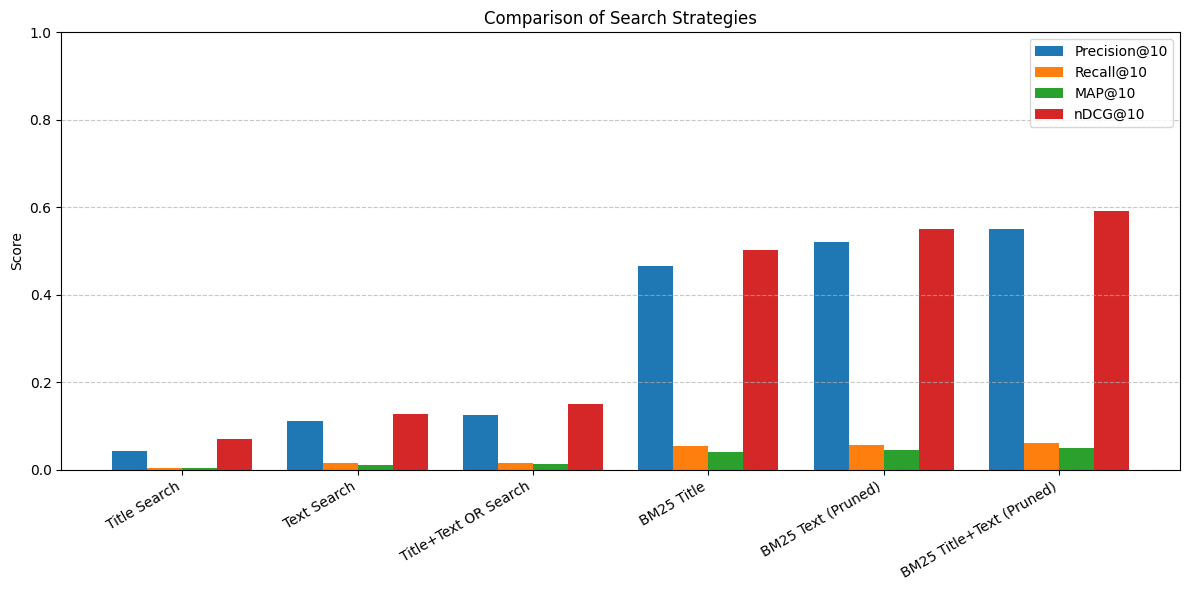

In [ ]:
import matplotlib.pyplot as plt

# -------------------------------
# Prepare data for plotting
# -------------------------------
metrics = ['Precision@10', 'Recall@10', 'MAP@10', 'nDCG@10']
strategies = results_table.index.tolist()
values = results_table[metrics].T  # transpose so metrics are rows

# -------------------------------
# Plot
# -------------------------------
x = np.arange(len(strategies))  # positions for bars
width = 0.2  # width of each bar

fig, ax = plt.subplots(figsize=(12,6))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width*1.5, values.loc[metric], width, label=metric)

# Customize plot
ax.set_xticks(x)
ax.set_xticklabels(strategies, rotation=30, ha='right')
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Comparison of Search Strategies')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


adding normalizer and tokenizer

                          Precision@10  Recall@10    MAP@10   nDCG@10
Title Search                     0.042   0.004166  0.003970  0.069624
Text Search                      0.112   0.013977  0.010632  0.126867
Title+Text OR Search             0.124   0.015440  0.012040  0.149296
BM25 Title                       0.482   0.055569  0.042496  0.517651
BM25 Text (Pruned)               0.522   0.056991  0.046311  0.556483
BM25 Title+Text (Pruned)         0.560   0.061445  0.050833  0.598052


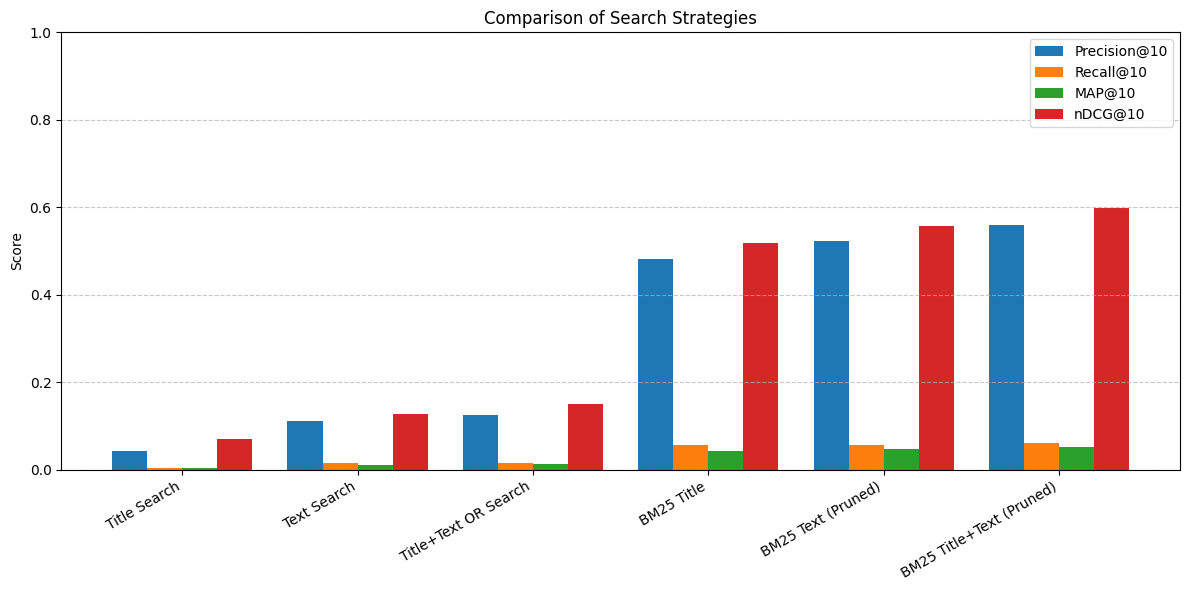

In [ ]:
import pandas as pd
import numpy as np
from rank_bm25 import BM25Okapi
import gc
import re

# -------------------------------
# Persian Normalizer and Tokenizer
# -------------------------------
def normalize_persian(text):
    text = str(text)
    # unify letters
    text = text.replace('ي','ی').replace('ك','ک')
    # remove diacritics
    text = re.sub(r'[\u064B-\u065F]', '', text)
    # remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    # normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_persian(text):
    return normalize_persian(text).split()

# -------------------------------
# Step 0: Load essential columns
# -------------------------------
df_docs = pd.read_csv(
    "/content/hamshahri2/docs.csv.gz",
    compression="gzip",
    usecols=['DOCID','TITLE','TEXT'],
    dtype={'DOCID': str, 'TITLE': str, 'TEXT': str}
)

df_queries_fa = pd.read_csv(
    "/content/hamshahri2/queries_fa.csv.gz",
    compression="gzip",
    usecols=['ID','TITLE'],
    dtype={'ID': str, 'TITLE': str}
)

df_judgments = pd.read_csv("/content/hamshahri2/judgments_dataframe.csv.gz", compression="gzip")
df_judgments['doc_id'] = df_judgments['doc_id'].astype(str)

# Build qrels
filtered = df_judgments[df_judgments["relevancy"] == 1]
qrels = {}
for query_id, group in filtered.groupby("query_id"):
    qrels[str(query_id)] = {str(doc_id): int(rel) for doc_id, rel in zip(group['doc_id'], group['relevancy'])}

# -------------------------------
# Step 1: Non-ranked searches
# -------------------------------
def search_in_titles(query, top_k=10):
    mask = df_docs['TITLE'].fillna('').str.contains(query, case=False, na=False)
    return df_docs.loc[mask, ['DOCID']].head(top_k)

def text_search_no_rank(query):
    mask = df_docs['TEXT'].fillna('').str.contains(query, case=False, na=False)
    return df_docs.loc[mask, ['DOCID']]

def search_title_text_no_rank(query):
    mask = (
        df_docs['TITLE'].fillna('').str.contains(query, case=False, na=False) |
        df_docs['TEXT'].fillna('').str.contains(query, case=False, na=False)
    )
    return df_docs.loc[mask, ['DOCID']]

def wrap_no_rank(search_func):
    def wrapped(query, top_k=10):
        return search_func(query).head(top_k)
    return wrapped

text_search_wrapped = wrap_no_rank(text_search_no_rank)
title_text_search_wrapped = wrap_no_rank(search_title_text_no_rank)

# -------------------------------
# Step 2: BM25 searches
# -------------------------------
# BM25 Title-only
tokenized_titles = [tokenize_persian(doc) for doc in df_docs['TITLE'].fillna("")]
bm25_title = BM25Okapi(tokenized_titles)
def bm25_title_search(query, top_k=500):
    scores = bm25_title.get_scores(tokenize_persian(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    return df_docs.iloc[top_idx]

# BM25 Text-only
def bm25_text_search_pruned(query, top_k=10, candidate_size=500):
    candidates = bm25_title_search(query, top_k=candidate_size)
    corpus = [tokenize_persian(doc) for doc in candidates['TEXT'].fillna('')]
    bm25_cand = BM25Okapi(corpus)
    scores = bm25_cand.get_scores(tokenize_persian(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    top_docs = candidates.iloc[top_idx][['DOCID']]
    del corpus, bm25_cand, scores
    gc.collect()
    return top_docs

# BM25 Title+Text
def bm25_title_text_search_pruned(query, top_k=10, candidate_size=500):
    candidates = bm25_title_search(query, top_k=candidate_size)
    combined = [(str(t) + " " + str(d)) for t,d in zip(candidates['TITLE'], candidates['TEXT'])]
    corpus = [tokenize_persian(doc) for doc in combined]
    bm25_cand = BM25Okapi(corpus)
    scores = bm25_cand.get_scores(tokenize_persian(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    top_docs = candidates.iloc[top_idx][['DOCID']]
    del corpus, bm25_cand, scores
    gc.collect()
    return top_docs

# -------------------------------
# Step 3: Evaluation metrics
# -------------------------------
def precision_at_k(retrieved_ids, relevant_ids, k):
    return len(set(retrieved_ids[:k]) & set(relevant_ids)) / k

def recall_at_k(retrieved_ids, relevant_ids, k):
    return len(set(retrieved_ids[:k]) & set(relevant_ids)) / len(relevant_ids) if relevant_ids else 0.0

def average_precision(retrieved_ids, relevant_ids, k):
    hits, score = 0, 0.0
    for i, doc_id in enumerate(retrieved_ids[:k]):
        if doc_id in relevant_ids:
            hits += 1
            score += hits / (i + 1)
    return score / len(relevant_ids) if relevant_ids else 0.0

def dcg(retrieved_ids, relevant_ids, k):
    return sum((1 if doc_id in relevant_ids else 0) / np.log2(idx + 2) for idx, doc_id in enumerate(retrieved_ids[:k]))

def ndcg(retrieved_ids, relevant_ids, k):
    ideal_dcg = dcg(list(relevant_ids), relevant_ids, min(k, len(relevant_ids)))
    return dcg(retrieved_ids, relevant_ids, k) / ideal_dcg if ideal_dcg > 0 else 0.0

def evaluate_search(search_func, top_k=10):
    precisions, recalls, aps, ndcgs = [], [], [], []
    for _, row in df_queries_fa.iterrows():
        query_id, query_text = str(row['ID']), row['TITLE']
        relevant_docs = qrels.get(query_id, {}).keys()
        retrieved_docs = search_func(query_text, top_k)['DOCID'].astype(str).tolist()
        precisions.append(precision_at_k(retrieved_docs, relevant_docs, top_k))
        recalls.append(recall_at_k(retrieved_docs, relevant_docs, top_k))
        aps.append(average_precision(retrieved_docs, relevant_docs, top_k))
        ndcgs.append(ndcg(retrieved_docs, relevant_docs, top_k))
    return {
        f'Precision@{top_k}': np.mean(precisions),
        f'Recall@{top_k}': np.mean(recalls),
        f'MAP@{top_k}': np.mean(aps),
        f'nDCG@{top_k}': np.mean(ndcgs)
    }

# -------------------------------
# Step 4: Evaluate all six search strategies
# -------------------------------
results_table = pd.DataFrame([
    evaluate_search(search_in_titles, top_k=10),
    evaluate_search(text_search_wrapped, top_k=10),
    evaluate_search(title_text_search_wrapped, top_k=10),
    evaluate_search(bm25_title_search, top_k=10),
    evaluate_search(bm25_text_search_pruned, top_k=10),
    evaluate_search(bm25_title_text_search_pruned, top_k=10)
], index=[
    'Title Search', 'Text Search', 'Title+Text OR Search',
    'BM25 Title', 'BM25 Text (Pruned)', 'BM25 Title+Text (Pruned)'
])

print(results_table)

# -------------------------------
# Step 5: Visualization
# -------------------------------
import matplotlib.pyplot as plt

metrics = ['Precision@10', 'Recall@10', 'MAP@10', 'nDCG@10']
strategies = results_table.index.tolist()
values = results_table[metrics].T

x = np.arange(len(strategies))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width*1.5, values.loc[metric], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(strategies, rotation=30, ha='right')
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Comparison of Search Strategies')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


finding stopwords

In [ ]:
import pandas as pd
from collections import Counter
import re

# Load necessary columns
df_docs = pd.read_csv(
    "/content/hamshahri2/docs.csv.gz",
    compression="gzip",
    usecols=['DOCID','TITLE','TEXT'],
    dtype=str
)

# Persian normalizer and tokenizer
def normalize_persian(text):
    text = str(text)
    text = text.replace('ي','ی').replace('ك','ک')
    text = re.sub(r'[\u064B-\u065F]', '', text)  # remove diacritics
    text = re.sub(r'[^\w\s]', ' ', text)        # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()    # normalize spaces
    return text

def tokenize_persian(text):
    return normalize_persian(text).split()

# Tokenize all documents (TITLE + TEXT)
all_tokens = []
for t, d in zip(df_docs['TITLE'].fillna(''), df_docs['TEXT'].fillna('')):
    combined = t + " " + d
    all_tokens.extend(tokenize_persian(combined))


In [ ]:
word_counts = Counter(all_tokens)
print("Top 50 most common words:")
print(word_counts.most_common(50))


Top 50 most common words:
[('و', 2688870), ('در', 2173022), ('به', 1843962), ('از', 1416599), ('این', 1078031), ('که', 1023638), ('می', 886696), ('است', 842147), ('را', 800580), ('با', 788364), ('های', 638274), ('برای', 403247), ('شود', 297920), ('شده', 291262), ('کرد', 289625), ('یک', 272763), ('ها', 272417), ('آن', 270016), ('شد', 262655), ('ایران', 250576), ('گفت', 245068), ('کشور', 244799), ('خود', 234200), ('سال', 227866), ('ای', 208259), ('بر', 195723), ('وی', 193913), ('تا', 190761), ('تهران', 173859), ('نیز', 169463), ('کند', 165810), ('بود', 159826), ('کرده', 129395), ('اسلامی', 128683), ('شرکت', 128629), ('کنند', 128343), ('گزارش', 127652), ('سازمان', 126893), ('خواهد', 124241), ('هم', 121652), ('دو', 118060), ('قرار', 117693), ('دارد', 117460), ('رئیس', 115607), ('روز', 113233), ('گروه', 110734), ('باید', 110262), ('اند', 109135), ('اعلام', 108385), ('دولت', 106985)]


In [ ]:
stopwords = [word for word, count in word_counts.most_common(200)]
print(stopwords[:50])


['و', 'در', 'به', 'از', 'این', 'که', 'می', 'است', 'را', 'با', 'های', 'برای', 'شود', 'شده', 'کرد', 'یک', 'ها', 'آن', 'شد', 'ایران', 'گفت', 'کشور', 'خود', 'سال', 'ای', 'بر', 'وی', 'تا', 'تهران', 'نیز', 'کند', 'بود', 'کرده', 'اسلامی', 'شرکت', 'کنند', 'گزارش', 'سازمان', 'خواهد', 'هم', 'دو', 'قرار', 'دارد', 'رئیس', 'روز', 'گروه', 'باید', 'اند', 'اعلام', 'دولت']


In [ ]:
doc_freq = Counter()
for t, d in zip(df_docs['TITLE'].fillna(''), df_docs['TEXT'].fillna('')):
    combined_tokens = set(tokenize_persian(t + " " + d))
    doc_freq.update(combined_tokens)

# Words that appear in > 70% of documents
num_docs = len(df_docs)
stopwords_df_based = [w for w, df in doc_freq.items() if df/num_docs > 0.7]
print(stopwords_df_based[:50])


['و', 'در', 'به']


deleting stopwords and seeing how it's effecting evaluation

In [ ]:
stopwords_set = set(stopwords)


In [ ]:
def tokenize_persian_no_stopwords(text):
    tokens = tokenize_persian(text)
    return [t for t in tokens if t not in stopwords_set]


In [ ]:
from rank_bm25 import BM25Okapi

# BM25 Title-only without stopwords
bm25_title_no_stop = BM25Okapi([tokenize_persian_no_stopwords(doc) for doc in df_docs['TITLE'].fillna("")])

# Candidate pruning: we’ll reuse previous functions but pass the new tokenizer


In [ ]:
# Title-only
def bm25_title_search_no_stop(query, top_k=500):
    scores = bm25_title_no_stop.get_scores(tokenize_persian_no_stopwords(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    return df_docs.iloc[top_idx]

# Text-only (pruned)
def bm25_text_search_no_stop(query, top_k=10, candidate_size=500):
    candidates = bm25_title_search_no_stop(query, top_k=candidate_size)
    corpus = [tokenize_persian_no_stopwords(doc) for doc in candidates['TEXT'].fillna('')]
    bm25_cand = BM25Okapi(corpus)
    scores = bm25_cand.get_scores(tokenize_persian_no_stopwords(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    top_docs = candidates.iloc[top_idx][['DOCID']]
    del corpus, bm25_cand, scores
    return top_docs

# Title+Text (pruned)
def bm25_title_text_search_no_stop(query, top_k=10, candidate_size=500):
    candidates = bm25_title_search_no_stop(query, top_k=candidate_size)
    combined = [(str(t) + " " + str(d)) for t,d in zip(candidates['TITLE'], candidates['TEXT'])]
    corpus = [tokenize_persian_no_stopwords(doc) for doc in combined]
    bm25_cand = BM25Okapi(corpus)
    scores = bm25_cand.get_scores(tokenize_persian_no_stopwords(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    top_docs = candidates.iloc[top_idx][['DOCID']]
    del corpus, bm25_cand, scores
    return top_docs


In [ ]:
results_no_stop = pd.DataFrame([
    evaluate_search(bm25_title_search_no_stop, top_k=10),
    evaluate_search(bm25_text_search_no_stop, top_k=10),
    evaluate_search(bm25_title_text_search_no_stop, top_k=10)
], index=[
    'BM25 Title (No Stopwords)',
    'BM25 Text (No Stopwords)',
    'BM25 Title+Text (No Stopwords)'
])

print(results_no_stop)


                                Precision@10  Recall@10    MAP@10   nDCG@10
BM25 Title (No Stopwords)              0.478   0.056373  0.044121  0.516636
BM25 Text (No Stopwords)               0.518   0.058707  0.046343  0.549342
BM25 Title+Text (No Stopwords)         0.608   0.067089  0.055305  0.636245


Evaluating Title...
Evaluating Text...
Evaluating Title+Text...
Evaluating Title NoStop...
Evaluating Text NoStop...
Evaluating Title+Text NoStop...
                   Precision@10  Recall@10    MAP@10   nDCG@10
Title                     0.482   0.055569  0.042496  0.517651
Text                      0.522   0.056991  0.046311  0.556483
Title+Text                0.560   0.061445  0.050833  0.598052
Title NoStop              0.478   0.056373  0.044121  0.516636
Text NoStop               0.518   0.058707  0.046343  0.549342
Title+Text NoStop         0.608   0.067089  0.055305  0.636245


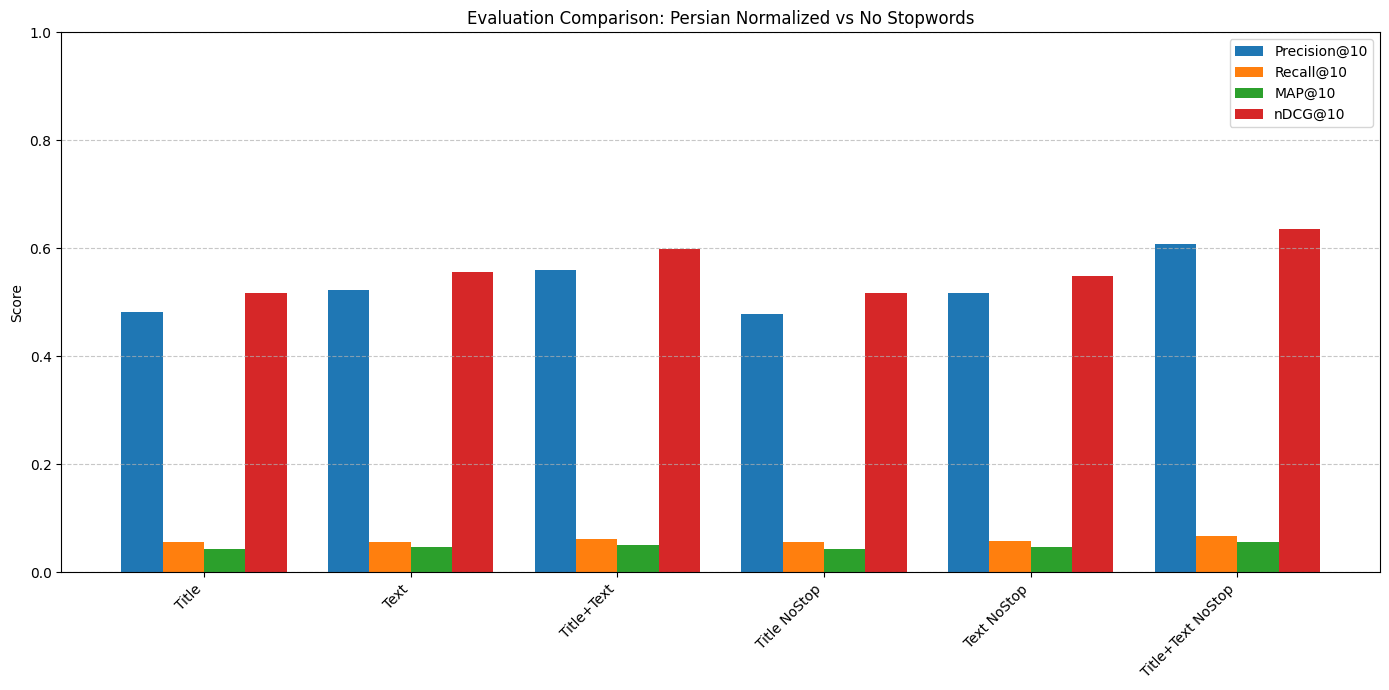

In [ ]:

# -------------------------------
# Colab-ready all-in-one BM25 + stopwords evaluation
# -------------------------------

import pandas as pd
import numpy as np
import re
from rank_bm25 import BM25Okapi
from collections import Counter
import matplotlib.pyplot as plt
import gc

# -------------------------------
# Step 1: Load essential columns
# -------------------------------
df_docs = pd.read_csv("/content/hamshahri2/docs.csv.gz", compression="gzip",
                      usecols=['DOCID','TITLE','TEXT'], dtype=str)
df_queries_fa = pd.read_csv("/content/hamshahri2/queries_fa.csv.gz", compression="gzip", dtype=str)
df_judgments = pd.read_csv("/content/hamshahri2/judgments_dataframe.csv.gz", compression="gzip", dtype=str)

# Build qrels dict
qrels = {}
filtered = df_judgments[df_judgments["relevancy"]=="1"]
for query_id, group in filtered.groupby("query_id"):
    qrels[str(query_id)] = {str(doc_id): 1 for doc_id in group["doc_id"]}

# -------------------------------
# Step 2: Persian normalizer + tokenizer
# -------------------------------
def normalize_persian(text):
    text = str(text)
    text = text.replace('ي','ی').replace('ك','ک')
    text = re.sub(r'[\u064B-\u065F]', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_persian(text):
    return normalize_persian(text).split()

# -------------------------------
# Step 3: Extract stopwords from corpus
# -------------------------------
all_tokens = []
for t,d in zip(df_docs['TITLE'].fillna(''), df_docs['TEXT'].fillna('')):
    combined = t + " " + d
    all_tokens.extend(tokenize_persian(combined))
word_counts = Counter(all_tokens)

# Take top 200 frequent words as stopwords
stopwords_set = set([w for w,_ in word_counts.most_common(200)])

def tokenize_no_stopwords(text):
    return [t for t in tokenize_persian(text) if t not in stopwords_set]

# -------------------------------
# Step 4: Prepare BM25 corpora
# -------------------------------
bm25_title = BM25Okapi([tokenize_persian(t) for t in df_docs['TITLE'].fillna('')])
bm25_title_no_stop = BM25Okapi([tokenize_no_stopwords(t) for t in df_docs['TITLE'].fillna('')])

# -------------------------------
# Step 5: BM25 search functions
# -------------------------------
def bm25_title_search(query, bm25_obj, tokenizer, top_k=500):
    scores = bm25_obj.get_scores(tokenizer(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    return df_docs.iloc[top_idx]

def bm25_text_search(query, bm25_obj, tokenizer, top_k=10, candidate_size=500):
    candidates = bm25_title_search(query, bm25_obj, tokenizer, top_k=candidate_size)
    corpus = [tokenizer(doc) for doc in candidates['TEXT'].fillna('')]
    bm25_cand = BM25Okapi(corpus)
    scores = bm25_cand.get_scores(tokenizer(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    top_docs = candidates.iloc[top_idx][['DOCID']]
    del corpus, bm25_cand, scores
    gc.collect()
    return top_docs

def bm25_title_text_search(query, bm25_obj, tokenizer, top_k=10, candidate_size=500):
    candidates = bm25_title_search(query, bm25_obj, tokenizer, top_k=candidate_size)
    combined = [(str(t) + " " + str(d)) for t,d in zip(candidates['TITLE'], candidates['TEXT'])]
    corpus = [tokenizer(doc) for doc in combined]
    bm25_cand = BM25Okapi(corpus)
    scores = bm25_cand.get_scores(tokenizer(query))
    top_idx = np.argsort(scores)[::-1][:top_k]
    top_docs = candidates.iloc[top_idx][['DOCID']]
    del corpus, bm25_cand, scores
    gc.collect()
    return top_docs

# -------------------------------
# Step 6: Evaluation metrics
# -------------------------------
def precision_at_k(retrieved, relevant, k):
    retrieved = retrieved[:k]
    rel_set = set(relevant)
    return sum([1 for r in retrieved if r in rel_set]) / k if k>0 else 0

def recall_at_k(retrieved, relevant, k):
    retrieved = retrieved[:k]
    rel_set = set(relevant)
    return sum([1 for r in retrieved if r in rel_set]) / len(rel_set) if len(rel_set)>0 else 0

def average_precision(retrieved, relevant, k):
    rel_set = set(relevant)
    score = 0
    hits = 0
    for i, r in enumerate(retrieved[:k], start=1):
        if r in rel_set:
            hits += 1
            score += hits / i
    return score / len(rel_set) if len(rel_set)>0 else 0

def ndcg_at_k(retrieved, relevant, k):
    rel_set = set(relevant)
    dcg = 0
    for i, r in enumerate(retrieved[:k], start=1):
        if r in rel_set:
            dcg += 1 / np.log2(i+1)
    idcg = sum([1 / np.log2(i+1) for i in range(1,min(len(rel_set),k)+1)])
    return dcg/idcg if idcg>0 else 0

def evaluate_search(search_func, top_k=10):
    precisions, recalls, maps, ndcgs = [], [], [], []
    for idx,row in df_queries_fa.iterrows():
        query_id, query_text = str(row['ID']), row['TITLE']
        relevant_docs = qrels.get(query_id, {}).keys()
        retrieved_docs = search_func(query_text, top_k)['DOCID'].astype(str).tolist()
        precisions.append(precision_at_k(retrieved_docs, relevant_docs, top_k))
        recalls.append(recall_at_k(retrieved_docs, relevant_docs, top_k))
        maps.append(average_precision(retrieved_docs, relevant_docs, top_k))
        ndcgs.append(ndcg_at_k(retrieved_docs, relevant_docs, top_k))
    return pd.Series([np.mean(precisions), np.mean(recalls), np.mean(maps), np.mean(ndcgs)],
                     index=['Precision@10','Recall@10','MAP@10','nDCG@10'])

# -------------------------------
# Step 7: Evaluate before and after stopwords removal
# -------------------------------
strategies = [
    ('Title', bm25_title_search, bm25_title, tokenize_persian),
    ('Text', bm25_text_search, bm25_title, tokenize_persian),
    ('Title+Text', bm25_title_text_search, bm25_title, tokenize_persian),
    ('Title NoStop', bm25_title_search, bm25_title_no_stop, tokenize_no_stopwords),
    ('Text NoStop', bm25_text_search, bm25_title_no_stop, tokenize_no_stopwords),
    ('Title+Text NoStop', bm25_title_text_search, bm25_title_no_stop, tokenize_no_stopwords)
]

results_comparison = {}
for name, func, bm25_obj, tokenizer in strategies:
    print(f"Evaluating {name}...")
    results_comparison[name] = evaluate_search(lambda q, top_k=10: func(q, bm25_obj, tokenizer, top_k=10), top_k=10)

results_df = pd.DataFrame(results_comparison).T
print(results_df)

# -------------------------------
# Step 8: Visualize comparison
# -------------------------------
metrics = ['Precision@10','Recall@10','MAP@10','nDCG@10']
strategies = results_df.index.tolist()
values = results_df[metrics].T

x = np.arange(len(strategies))
width = 0.2

fig, ax = plt.subplots(figsize=(14,7))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width*1.5, values.loc[metric], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(strategies, rotation=45, ha='right')
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_title('Evaluation Comparison: Persian Normalized vs No Stopwords')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


table showing the effect of stopwords removal for k =100,500,1000

In [ ]:
# -------------------------------
# Define k values
k_values = [100, 500, 1000]

# Strategies to evaluate: before and after stopwords removal
strategies = [
    ('Title', bm25_title_search, bm25_title, tokenize_persian),
    ('Text', bm25_text_search, bm25_title, tokenize_persian),
    ('Title+Text', bm25_title_text_search, bm25_title, tokenize_persian),
    ('Title NoStop', bm25_title_search, bm25_title_no_stop, tokenize_no_stopwords),
    ('Text NoStop', bm25_text_search, bm25_title_no_stop, tokenize_no_stopwords),
    ('Title+Text NoStop', bm25_title_text_search, bm25_title_no_stop, tokenize_no_stopwords)
]

# -------------------------------
# Function to evaluate all ks
def evaluate_for_ks(search_func, top_ks=[100,500,1000]):
    results = {}
    for k in top_ks:
        s = evaluate_search(lambda q, top_k=k: search_func(q, top_k=k), top_k=k)
        results[f'k={k}'] = s
    return pd.DataFrame(results)

# -------------------------------
# Compute results for all strategies
final_results = {}
for name, func, bm25_obj, tokenizer in strategies:
    print(f"Evaluating {name} for all k...")
    final_results[name] = evaluate_for_ks(lambda q, top_k: func(q, bm25_obj, tokenizer, top_k=top_k),
                                          top_ks=k_values)

# -------------------------------
# Combine into one table
results_table_k = pd.concat(final_results, axis=0)
results_table_k.index.names = ['Strategy', 'Metric']

# Show table
pd.set_option('display.max_rows', 100)
results_table_k


Evaluating Title for all k...
Evaluating Text for all k...
Evaluating Title+Text for all k...
Evaluating Title NoStop for all k...
Evaluating Text NoStop for all k...
Evaluating Title+Text NoStop for all k...


k=100     k=500    k=1000
Strategy          Metric                                    
Title             Precision@10  0.223800  0.080080  0.049680
                  Recall@10     0.230714  0.380013  0.456840
                  MAP@10        0.116454  0.141383  0.147380
                  nDCG@10       0.322003  0.365128  0.404603
Text              Precision@10  0.217600  0.080080  0.040040
                  Recall@10     0.212090  0.380013  0.380013
                  MAP@10        0.118248  0.137886  0.137886
                  nDCG@10       0.322995  0.363117  0.363117
Title+Text        Precision@10  0.244200  0.080080  0.040040
                  Recall@10     0.233364  0.380013  0.380013
                  MAP@10        0.137536  0.159299  0.159299
                  nDCG@10       0.358076  0.379746  0.379746
Title NoStop      Precision@10  0.222600  0.078960  0.049460
                  Recall@10     0.231090  0.376089  0.461095
                  MAP@10        0.122089  0.145149  0.151518
                  nDCG@10       0.326204  0.365874  0.408932
Text NoStop       Precision@10  0.227000  0.078960  0.039480
                  Recall@10     0.223146  0.376089  0.376089
                  MAP@10        0.124651  0.142734  0.142734
                  nDCG@10       0.333233  0.363705  0.363705
Title+Text NoStop Precision@10  0.262800  0.078960  0.039480
                  Recall@10     0.258676  0.376089  0.376089
                  MAP@10        0.158330  0.180645  0.180645
                  nDCG@10       0.382633  0.391294  0.391294

extract the best results for each metric and clearly show which strategy achieved it

In [ ]:
# Initialize a dictionary to store best results
best_results = {}

# Loop over each metric
metrics = ['Precision@10','Recall@10','MAP@10','nDCG@10']
for metric in metrics:
    best_for_metric = []
    # Loop over each k
    for k in k_values:
        col = f'k={k}'
        # Find the row (strategy) with the maximum value for this metric and k
        max_val = results_table_k.loc[(slice(None), metric), col].max()
        max_strategy = results_table_k.loc[(slice(None), metric), col].idxmax()[0]
        best_for_metric.append((max_strategy, max_val))
    best_results[metric] = best_for_metric

# Convert to DataFrame for display
best_results_df = pd.DataFrame(best_results, index=[f'k={k}' for k in k_values])
best_results_df


,Precision@10,Recall@10,MAP@10,nDCG@10
k=100,"(Title+Text NoStop, 0.2628)","(Title+Text NoStop, 0.25867590143622343)","(Title+Text NoStop, 0.15832966761399248)","(Title+Text NoStop, 0.38263316587780805)"
k=500,"(Title, 0.08008000000000001)","(Title, 0.3800134191166281)","(Title+Text NoStop, 0.18064496071521766)","(Title+Text NoStop, 0.39129396769752134)"
k=1000,"(Title, 0.04968)","(Title NoStop, 0.46109495155749386)","(Title+Text NoStop, 0.18064496071521766)","(Title NoStop, 0.4089323555012026)"
